## Prosper Loans - A Peek at the Investment Landscape

## Motivation

While there are many avenues to get loans these days, one of the trends in today's market is crowdsourcing. Prosper capitalizes on this trend to facilitate crowdsourcing loans between \\$ 2000 to \\$ 40,000. People or companies can invest in individuals by acting as a bank or investor. Prosper was founded in 2005, and has since faciliated loans to almost one million people.

While many might look into getting a loan through Prosper, others might look into becoming investors to help - and subsequently - gain on their investment. This is the perspective I will be taking you through in this explanatory analysis.

## Dataset


The Prosper loan dataset contains 113,937 loans with 81 variables on each loan. That's a lot of variables, so I'll be focusing on only a couple of them.

## Perspective

Since I'm taking the perspective of an investor, there are a couple of things I will be looking for. Specifically, as an investor trying to decide if investing through Prosper is a good idea, there is one main topic I look at:

#### How good are Prosper borrowers in seeking, justifying, and paying back loans? If I were to invest, who would I invest in?

To do this, we can pretend we're a bank and identify trends in:

* Credit History Trends
* Cash flow Trends
* Collateral spread
* Borrower Character Trends

For each of these categories, we can identify variables that might help us gain clarity.

#### Credit History Trends
* Current Delinquencies
* Credit Score
* Total Inquiries
* Debt to Income Ratio

#### Cash Flow Trends
* Salary Ranges
* Revolving Monthly Credit

#### Collateral Spread
* Listing Category
* Occupation
* Is Borrower Home owner

#### Borrower Character Trends
* Credit Score
* Total Prosper Loans
* Recommendations
* Investors
* Amount Delinquent

The following insights have been gathered through an exploratory process that went through each of the above variables and categories to gather data.

#### Data Setup

In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', None)  
%matplotlib inline

In [2]:
BankCopy = pd.read_csv('FinalDataset.csv')

### Insights

### Prosper Score Distributions

Prosper scores tend to follow a normal distribution as with a lot of data in the real world. Most scores fall between 4 and 8.

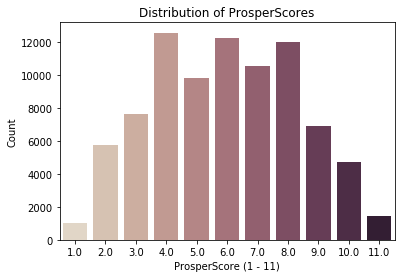

In [3]:
sb.countplot(data = BankCopy, x = 'ProsperScore', palette="ch:.25");
plt.xlabel('ProsperScore (1 - 11)');
plt.ylabel('Count');
plt.title('Distribution of ProsperScores');

### Loan Count by State

California tends to have the most loans in general. By sheer numbers, that wouldn't be a bad place to start investing.

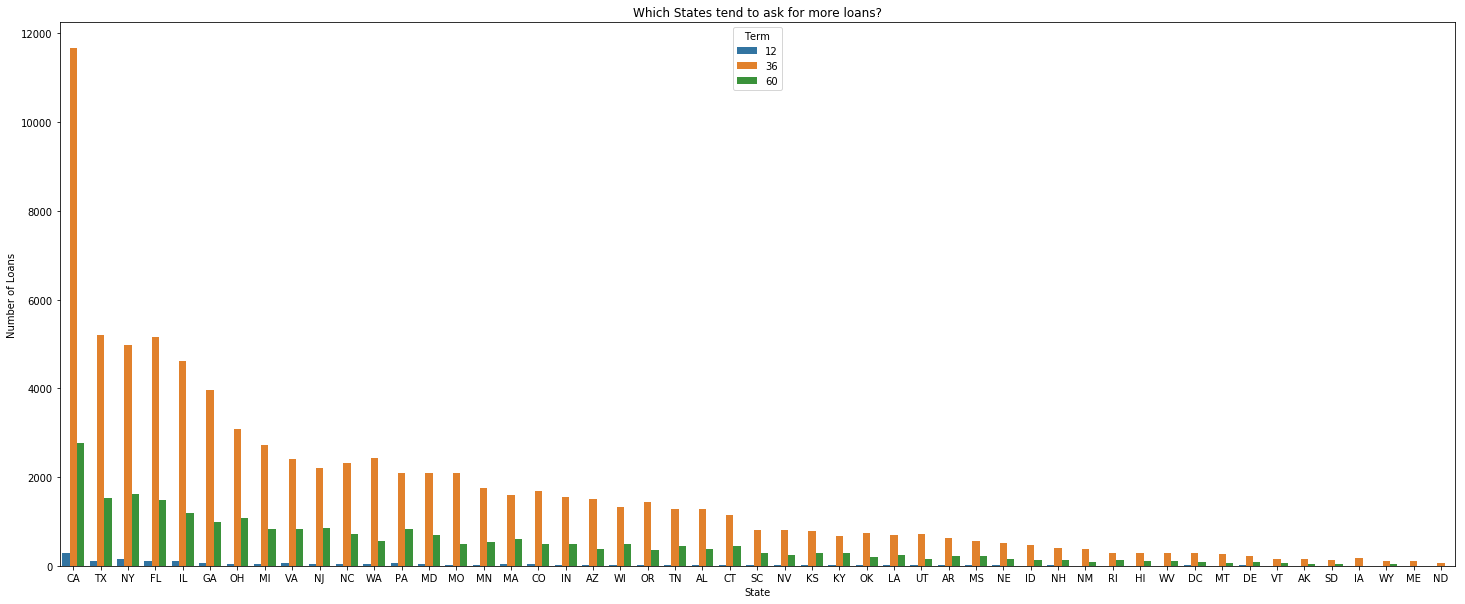

In [4]:
plt.figure(figsize=(25,10))
sb.countplot(data = BankCopy, x='BorrowerState', hue = 'Term', order = BankCopy['BorrowerState'].value_counts().index);
plt.title('Which States tend to ask for more loans?')
plt.xlabel('State');
plt.ylabel('Number of Loans');

### Credit Score Distributions

FICO Credit score distributions closely match real world data. I bucketized averages of the ranges the original set had, and use FICO ranges to set their category

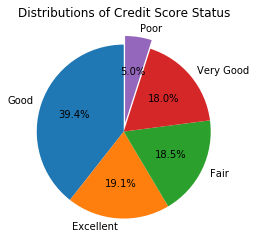

In [5]:
plt.pie(BankCopy.CreditScoreCat.value_counts(), labels = BankCopy.CreditScoreCat.value_counts().index.tolist(), explode = [0.0, 0.0, 0.0, 0.0, 0.1], autopct='%1.1f%%',  startangle=90);
plt.title('Distributions of Credit Score Status');

### Delinquency count correlates with more Failed Loans

You would guess that having more delinquencies would correlate to more risky investments. This is fairly true in this case - Current Delinquencies does have correlation with the loan status. That is, it's more likely that people with more delinquencies willl default on their loans. However, a lot of borrowers have > 10 delinquencies, and are still able to pay off their loans.

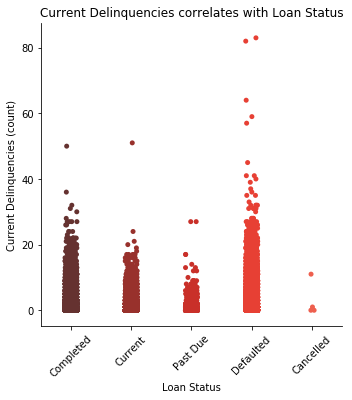

In [6]:
sb.catplot(data = BankCopy, x='LoanStatusCat', y = 'CurrentDelinquencies', palette=sb.color_palette("Reds_d"));
plt.xlabel('Loan Status');
plt.ylabel('Current Delinquencies (count)');
plt.xticks(rotation=45);
plt.title("Current Delinquencies correlates with Loan Status");

### Debt to Income Ratio can predict loan status across credit score categories

Another interesting pattern we notice when trying to predict loan status is debt to income ratio and credit score. 

Debt to income ratio is a ratio that describes an individuals current starus in relation to the debts they owe and their income. Ideally, the DRI Ratio is lower, and a high ratio might describe risky borrowers. An intersting find is that this is mostly true with relation to predicting loan status. Defaulted loans tend to have higher debt to income ratios.

Also to note, this seems to apply regardless of your credit score.

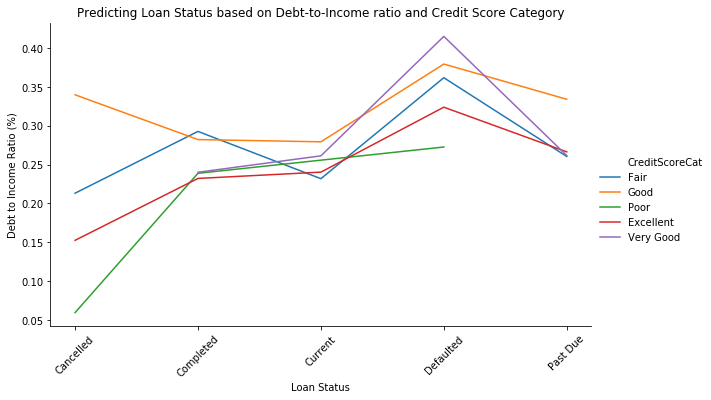

In [7]:
sb.relplot(data = BankCopy, x='LoanStatusCat', y = 'DebtToIncomeRatio', kind="line", hue='CreditScoreCat', ci=None, sort = True, aspect=1.7)
plt.xticks(rotation=45)
plt.title('Predicting Loan Status based on Debt-to-Income ratio and Credit Score Category')
plt.xlabel('Loan Status');
plt.ylabel('Debt to Income Ratio (%)');

### Credit Scores are still useful indicators for loan completion

Of course, credit score continues to be a valuable indicator of risk assessment:

Text(3.549999999999997, 0.5, 'Credit Score')

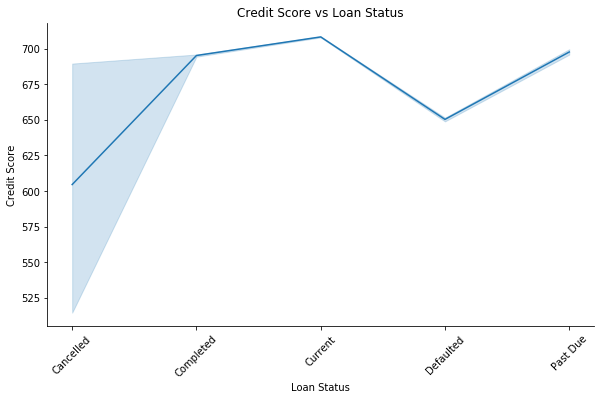

In [8]:
%%capture --no-display

sb.relplot(data = BankCopy, x='LoanStatusCat', y = 'CreditScoreAvg', kind="line", sort = True, aspect=1.7);
plt.xticks(rotation=45);
plt.title('Credit Score vs Loan Status');
plt.xlabel('Loan Status');
plt.ylabel('Credit Score');

### Borrowers with Higher Credit Scores across income ranges are better at managing money

Paired with BankCardUtilization, we can see that those with higher credit scores are again probably better investments. Bank Card Utiliztion is how much of an individuals revolving credit was being used at the time of gathering the data. The trend we see is that regardless of income range, those with higher credit scores tend to be better at keeping their balance low. 

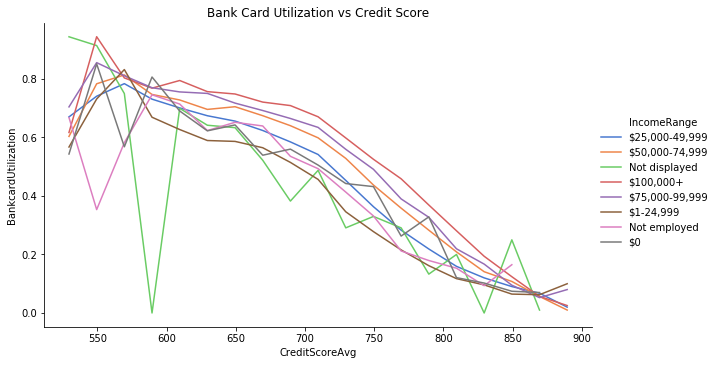

In [9]:
sb.relplot(data = BankCopy, x = 'CreditScoreAvg', y = 'BankcardUtilization', hue = 'IncomeRange', palette = 'muted', kind="line", ci = None, aspect=1.7);
plt.title('Bank Card Utilization vs Credit Score');

### Borrowers with Collateral are better at paying off loans

Another good category to invest in, I found, is those with collateral are more likely to have less risk. Specifically, those who took loans for household work (indicating the presence of collateral) were better off at paying back loans, and providing higher average returns. The "Other" category here consists of loans that either don't have collateral, or have collateral that is not traditionally considered as such.

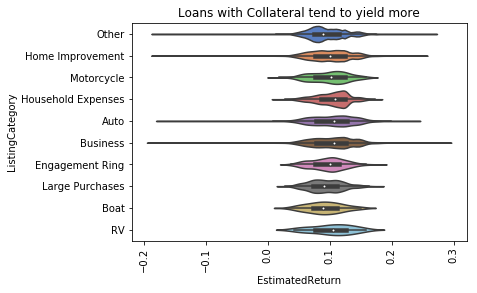

In [10]:
sb.violinplot(data = BankCopy, y = 'ListingCategory', x = 'EstimatedReturn', palette= 'muted');
plt.xticks(rotation = 90);
plt.ylabel('Collateral Type')
plt.xlabel('Extimated Return (%)')
plt.title('Loans with Collateral tend to yield more');

Specifically, borrowers with homes return better yields.

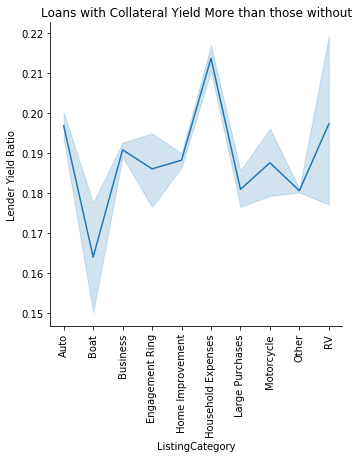

In [11]:
sb.relplot(data = BankCopy, x = 'ListingCategory', y = 'LenderYield', kind = 'line');
plt.xticks(rotation = 90);
plt.title('Loans with Collateral Yield More than those without');
plt.ylabel('Lender Yield Ratio');

### Prosper Score is another valid loan status indicator

Finally, ProsperScores (along with a custom CharacterScore) are fair indicators of good investments. Prosper scores above 7 tend to be worthy, while character scores above 10 are almost certain to pay back their loans.

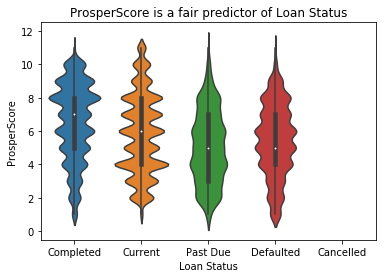

In [12]:
sb.violinplot(data = BankCopy, x = 'LoanStatusCat', y = 'ProsperScore');
plt.xlabel('Loan Status');
plt.title('ProsperScore is a fair predictor of Loan Status');

#### On CharacterScore

CharacterScore is a custom metric I came up with to enhance ProsperScore weight. Essentially, CharacterScore takes a look at variables that might predict a borrowers character - Recommendations, Past Prosper History, etc. - along with the variables that ProsperScore looks at - Debt to Income Ratio, number of credit inquiries - to create a numeric value (that can be negative, unlike Prosper Scores) to predict good character. The score starts off at 0, and goes either up or down based on: 

* <b>InquiriesLast6Months:</b> -0 for each inquiry until 4, -1 thereafter
* <b>TotalInquiries:</b> -0 for each inquirt until 7, -1 thereafter
* <b>CurrentDelinquencies:</b> -1 for each delinquent account above 1
* <b>BankcardUtilization:</b> +1 until 30%, -1 if between 30 - 60, -2 if between 60 - 100
* <b>Debt to income ratio (DTI_Level):</b> +2 for excellent and very good, -0 for fair, -1 for poor or very poor 
* <b>Investors:</b> +1 if 1, +2 if > 1
* <b>InvestmentFromFriendsCount:</b> +1 for each.
* <b>Recommendations:</b> +1 for each.
* <b>ProsperPaymentsOneMonthPlusLate:</b> -1 for each above 2, +2 for 0.

#### How is this different from ProsperScore?

CharacterScore is an extension of ProsperScore, which is the numeric rating Prosper Loans sets on borrowers. ProsperScore is calculated with:

* Number of inquiries on the credit bureau
* Number of delinquent accounts on the credit bureau
* Credit card utilization on the credit bureau
* Number of recently opened trades on the credit bureau
* Debt to income ratio
* Loan payment performance on prior Prosper loans


The CharacterScore distribution shows off some major left-skew. Most of the scores are around 0 - 10, with a major subset around 1 - 5.

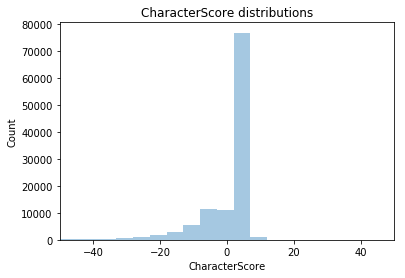

In [13]:
bins = np.arange(min(BankCopy.CharacterScore), max(BankCopy.CharacterScore), 5);
sb.distplot(BankCopy.CharacterScore, bins=bins, kde=False);
plt.xlim(-50, 50);
plt.ylabel('Count');
plt.title('CharacterScore distributions');

Scores above 10 are almost guaranteed to be good investments. Above 0 are also a good measure. However, a large number of scores are below 0, and are still able to pay off loans.

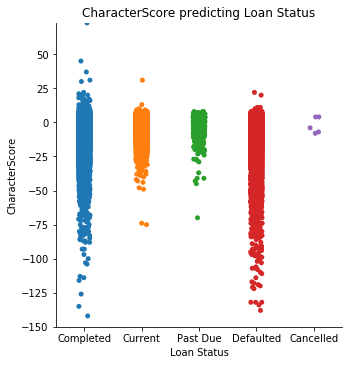

In [14]:
sb.catplot(data = BankCopy, x = 'LoanStatusCat', y = 'CharacterScore');
plt.ylim(-150,BankCopy.CharacterScore.max());
plt.xlabel('Loan Status');
plt.title('CharacterScore predicting Loan Status');

Comparing CharacterScore to ProsperScore, we can see that they are fairly well connected:

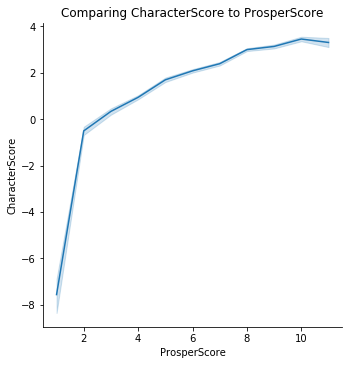

In [15]:
sb.relplot(data=BankCopy, x = 'ProsperScore', y = 'CharacterScore', kind = 'line', sort = True);
plt.title("Comparing CharacterScore to ProsperScore");

#### So who do we invest in?

Summarizing our findings, we can fairly confidently say:
- Based on sheer numbers, California, New York, Florida and Texas would be good places to start investing simply because of the range of choices.
- If basing investments on Loan Status (completed, cancelled etc.) we can choose borrowers based on:
    * CreditScore
	* Debt to Income Ratio
	* CharacterScores > 10
- Customers with Collateral - items that can be repossesed - specifically Houses, are better at paying off loans and provide more profits
- Credit Score of course is a good indicator as well, as they are better at keeping revolving balances low.